#Capstone Project 3 - Cardiovascular Risk Prediction

#(Supervised - Classification)

Project by ANKIT RAI

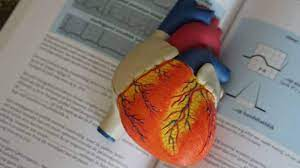

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.


The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).


The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


Data Description

Demographic:

Sex: male or female("M" or "F")

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)


Medical( history)
BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)


Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in

fact discrete, yet are considered continuous because of large number of possible values.)

Glucose: glucose level (Continuous)
Predict variable (desired target)

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV


Project Process
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Transformation
4. Modelling and Evaluation
5. Hyperparameter Tuning

In [ ]:
#Importing libraries

# Data manipulation
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter


In [ ]:
# Importing the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the data
data = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [ ]:
# Inspecting the first 5 rows of the data
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Information about various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Statistical Description of the data
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#1. Data Cleaning

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

In [ ]:
# Dropping the 'id' column
data.drop('id', axis = 1, inplace = True)

In [ ]:
# Summing null values
data.isna().sum()[data.isna().sum() > 0]

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

We must try to fill the null values intelligently rather than dropping them because we start with a limited collection of 3390 rows.
Because 'education' and 'BPMeds' are categorical variables, we shall fill the null values with mode.

In [ ]:
# Filling null values of education
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
# Understanding value counts of BP Meds
data['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])
     

In [ ]:
# Applying the function to fill null values of the column with mode
mode_fillna(df = data, columns = ['education','BPMeds'])

Because the columns 'cigsPerDay,' 'totChol,' 'BMI,' 'heartRate,' and 'glucose' are continuous and have outliers, median will be useful to fill the null values.

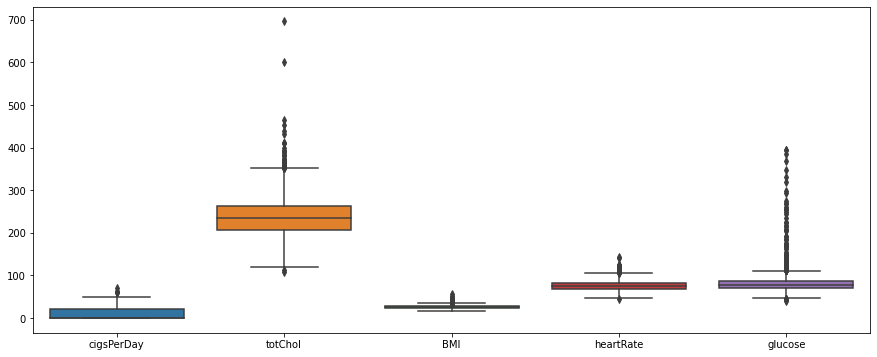

In [ ]:
# Distribution of the continous columns with null values
plt.figure(figsize=(15,6))
sns.boxplot(data=data[['cigsPerDay','totChol','BMI','heartRate','glucose']])
     

In [ ]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())
     

In [ ]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = data, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])

In [ ]:
# Checking for null values after treating the null values
data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Statistical Description of data after treating null values
data.describe(include = 'all')
     

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.946018,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [ ]:
# Information of data after treating null values
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


All null values have been successfully filled strategically.

In [ ]:
# No cigarettes smoked though the smoking column is yes
data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


#As seen above, there are records with the 'is smoking' column set to 'YES,' yet no cigarettes are smoked.

In [ ]:
# Value counts before correction
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
# Correcting the 'is_smoking' column to 'NO' where there are no cigarettes smoked
data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0), 'is_smoking'] = 'NO'
     

In [ ]:
# Values counts after correction
data['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

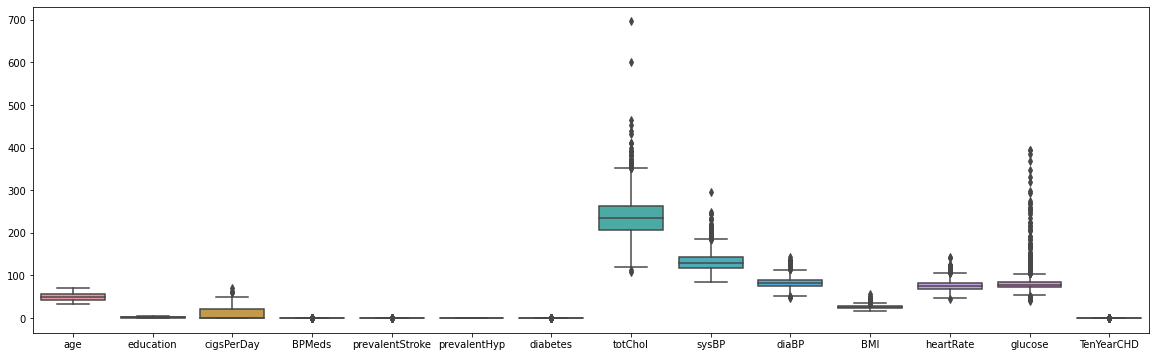

In [ ]:
# Boxplot for all columns
plt.figure(figsize=(20,6))
sns.boxplot(data=data)

In [ ]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(data[data[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(data[data[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(data[data[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df
     

In [ ]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
3,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
4,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000


The dataframe above explains the effect of removing outliers. If the outliers in this scenario are removed, many rows will be lost, potentially resulting in CHD.

In this circumstance, it is known that people with high levels of Cholestrol, BP, Glucose, BMI, and so on are predisposed to heart disease. As a result, removing higher numbers is not considered.

 Exploratory Data Analysis 

Concentrate on the dependent variable.
The 'TenYearCHD' column, which indicates the risk of coronary heart disease in the next ten years, is the dependent variable here.
It is a binary variable, which means it contains the numbers 0 and 1, with 0 indicating no risk of heart disease and 1 indicating a risk of heart disease.
Because our dependent variable is discrete categorical,

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


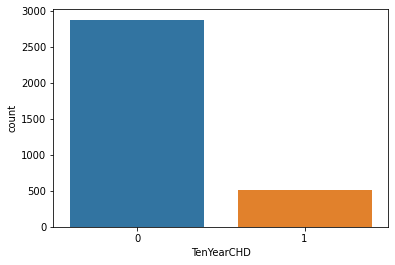

In [ ]:
# Distribution of our dependent variable
sns.countplot(data['TenYearCHD'])

#Focus on the independent variables

In [ ]:
# Creating a list for different column types
categorical_columns = ['sex','is_smoking','education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
# Creating a function to plot countplots for categorical columns
def count_plotting(columns):
  ''' Returns subplots of countplot graphs using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,50))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = data, x = column)

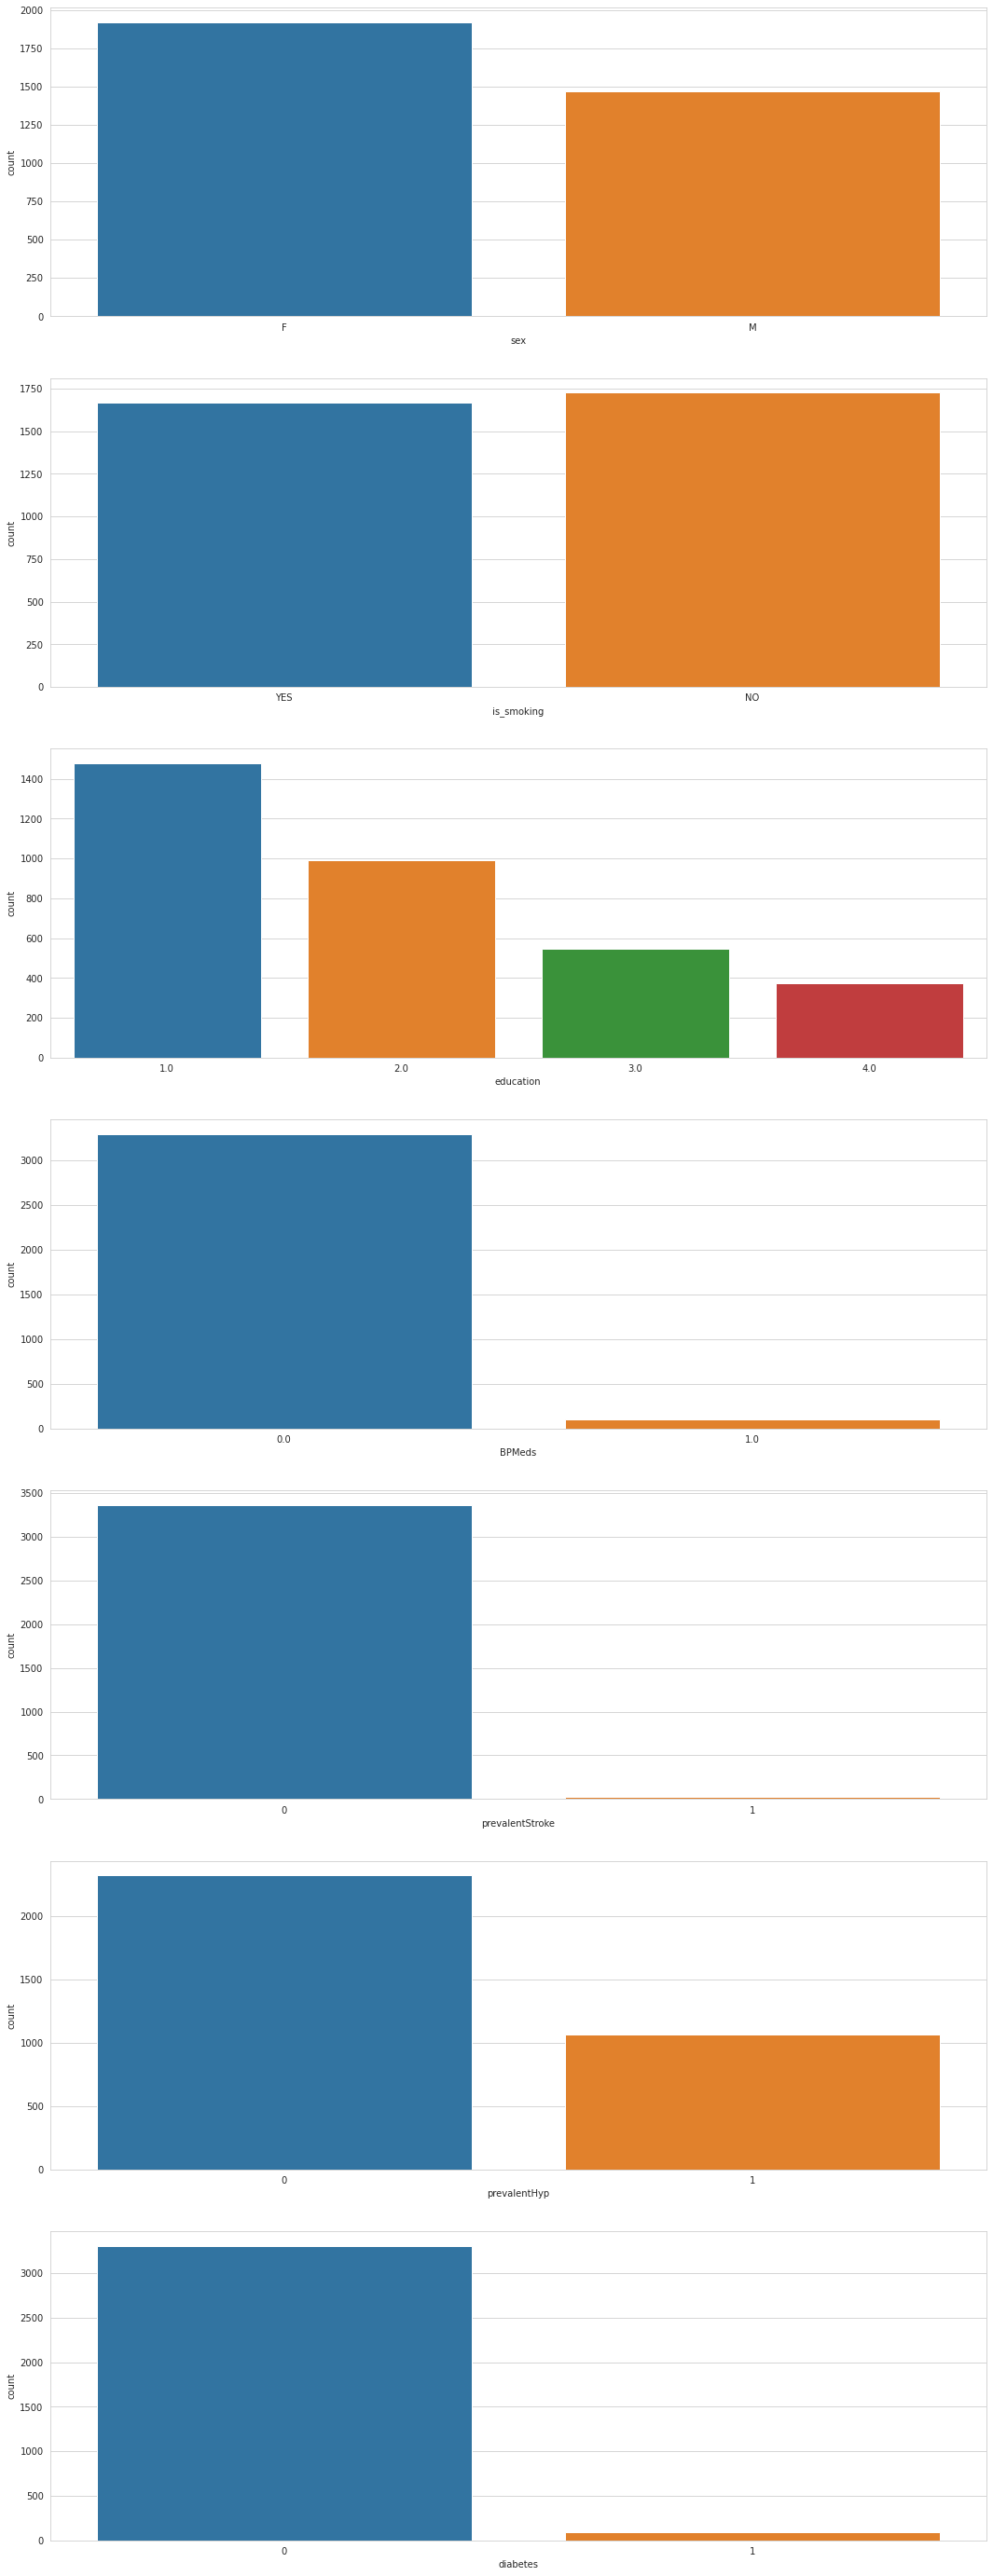

In [ ]:
# Creating countplots using above function
count_plotting(categorical_columns)

The graphs above depict category columns in the form of countplots-

:-allowing us to realise that: Females outnumber men by a little margin.

:-Nonsmokers outnumber smokers by a little amount; both number around 1600.

:-Around 1500 people have a level 1 education, while around 400 have a level 4 degree. The levels aren't specified.

:-More than 3000 people are not taking blood pressure medicine.

:-Only a small minority of people have previously experienced a stroke.

:-Approximately 1000 persons were hypertensive.

:-A high proportion of people (over 3000) do not have diabetes.

In [ ]:
# Creating a function to plot distribution of numerical columns
def dist_plotting(columns):
  ''' Returns subplots of histograms using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,40))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.histplot(ax = axes[i], x = data[column], kde = True)
     

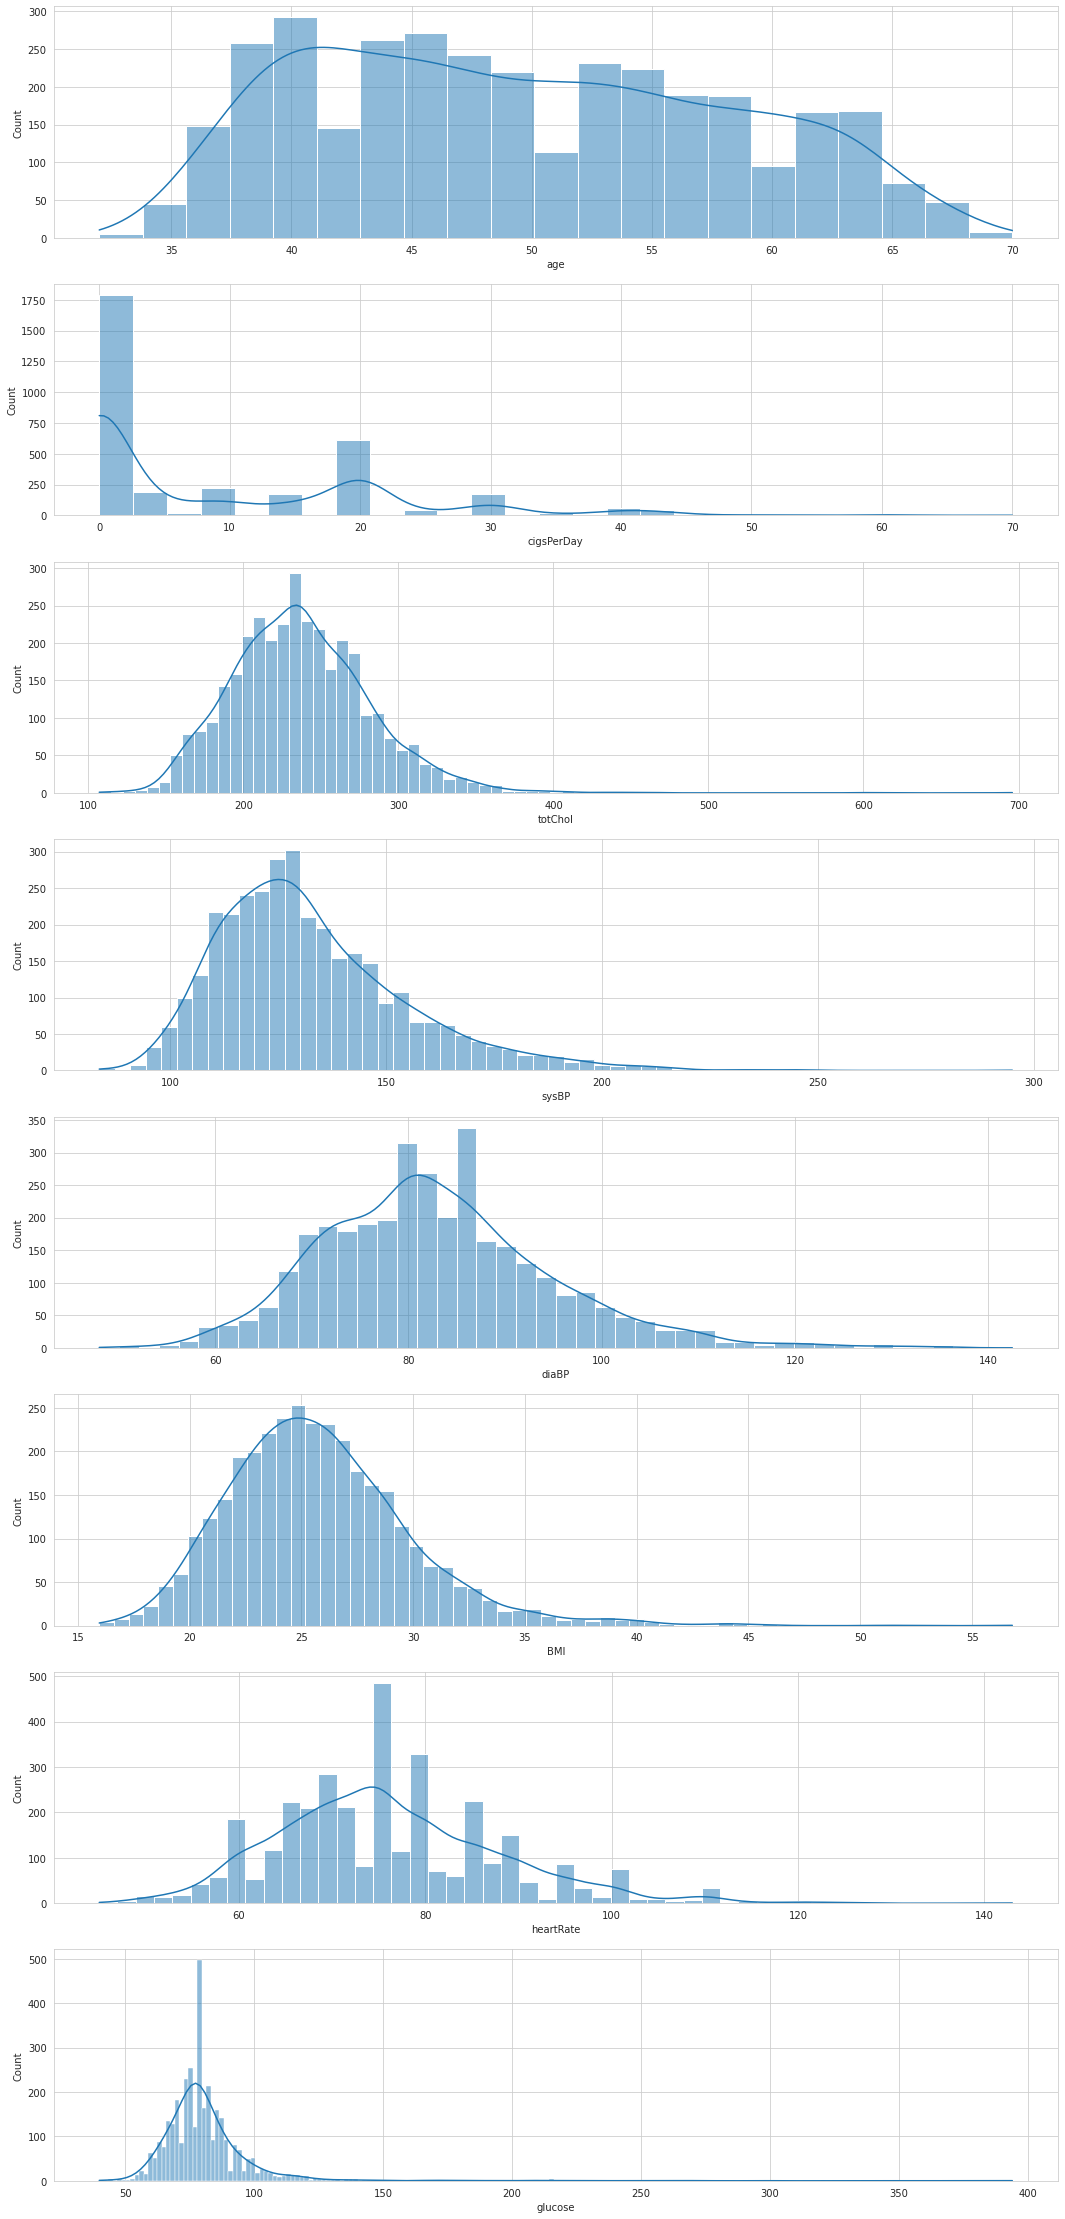

In [ ]:
# Using the function to plot graphs for numerical columns
dist_plotting(numerical_columns)

As shown by the histograms above, we can deduce:-

*Age spans from 35 to 70 years, with the majority of persons falling between the ages of 40 and 50.

*The average number of cigarettes smoked per day is zero, however 20 cigarettes per day are very common.

*Cholestrol has a range of 100 to 700, with the majority being between 150 and 350.

*Systolic blood pressure typically ranges from 100 to 200.

*Diastolic blood pressure typically ranges from 60 to 120.

*BMI typically runs from 16 to 40.

*The heart rate ranges from 40 to 110, with the majority of occurrences occurring around 75.

*Glucose ranges primarily from 50 to 125; the rest appear to be outliers with extreme numbers, but they must be ignored because these numbers can increase the risk of diabetes.

#We can understand from the data that, it has wide range of numbers, which indicates that both healthy and unhealthy people are considered. To get a clear understanding of risk of heart disease all these categories play an important role, especially those which are on the higher end as these extreme numbers may make a person more vulnerable to heart disease.

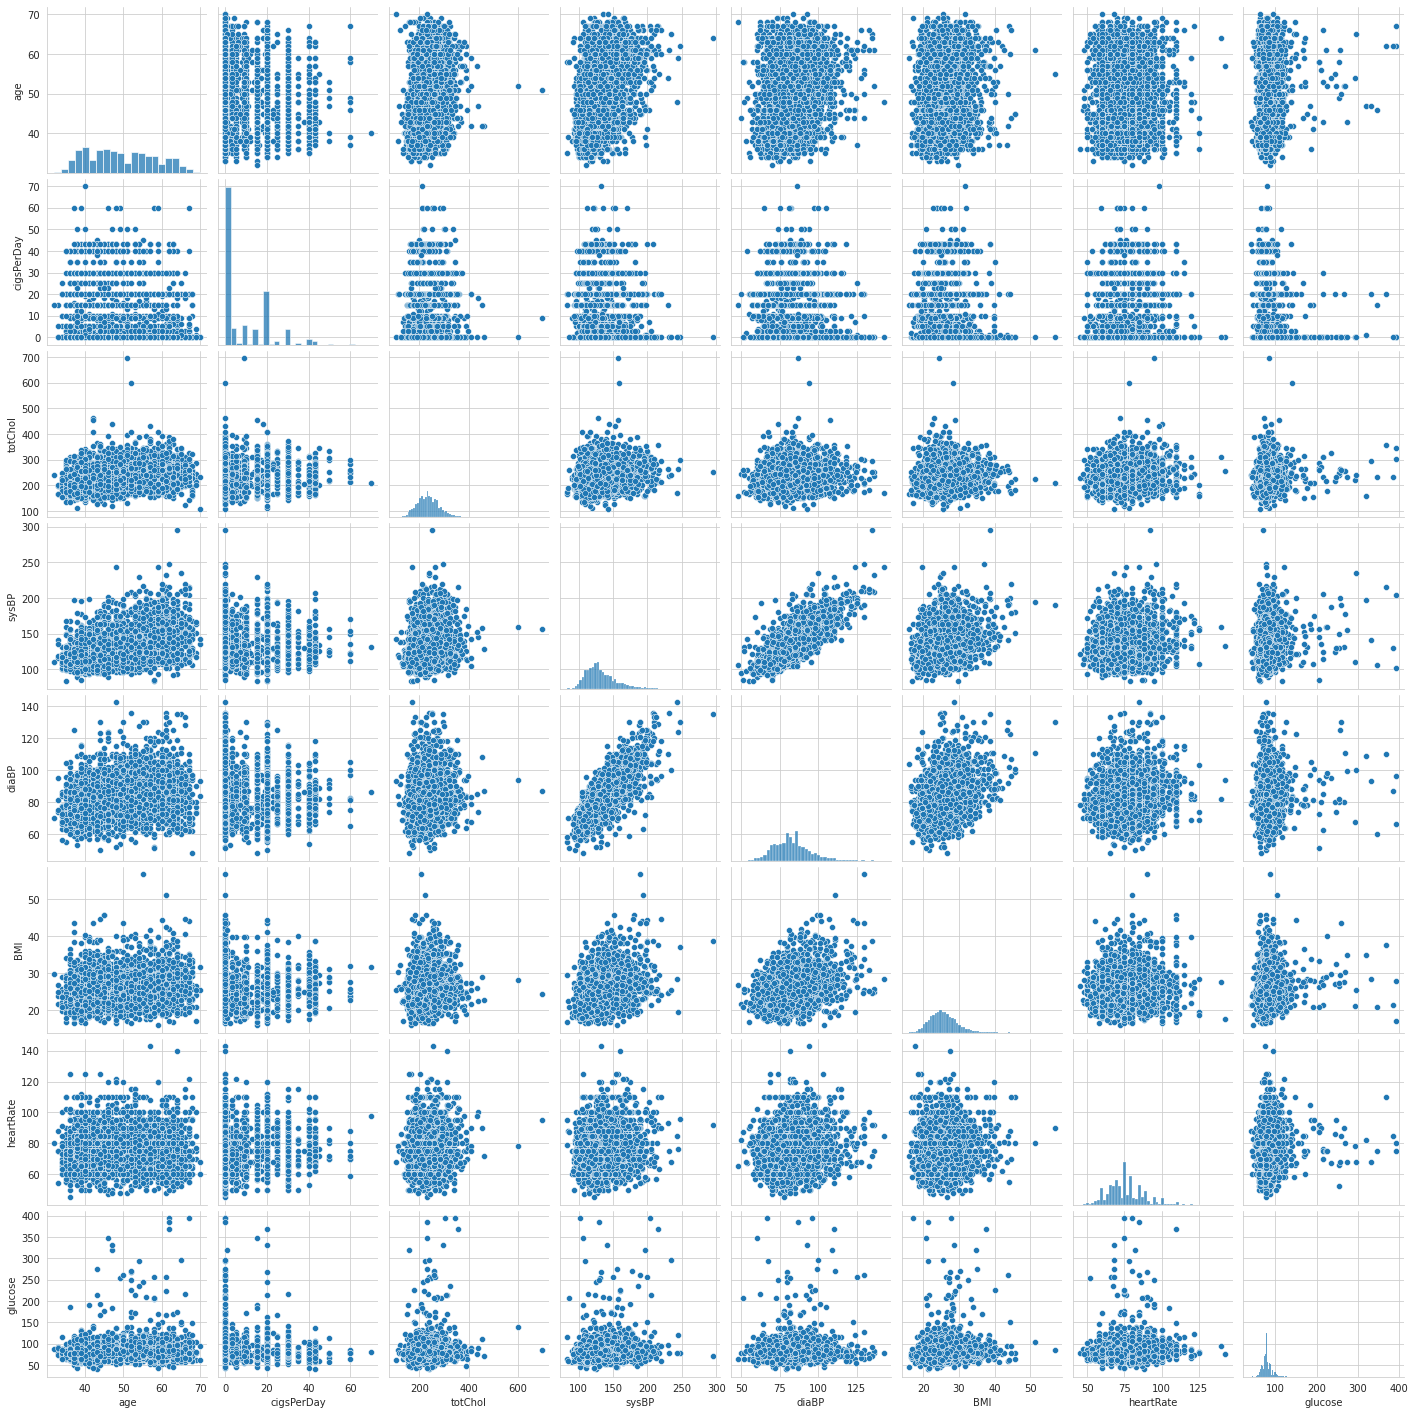

In [ ]:
# Bivariate analysis using pairplot
sns.pairplot(data[numerical_columns])

Because the preceding Pairplot explains bivariate analysis for all of the number columns,

we can conclude that: When cholesterol is low, systolic blood pressure remains low.

The association between systolic and diastolic blood pressure is favourable.

In most circumstances, lower cholesterol equals lower glucose.

Diastolic blood pressure, systolic blood pressure, and BMI all exhibit a minor positive connection.

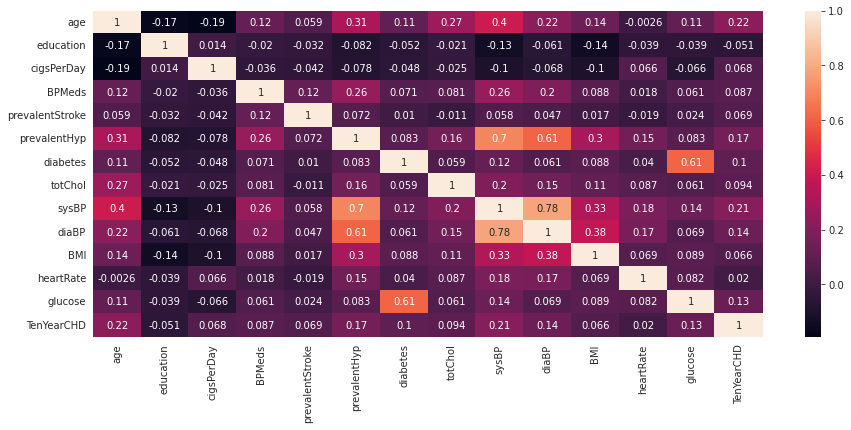

In [ ]:
# Using a heatmap to show correlation
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), annot = True)

According to the heatmap, the highest association exists between systolic and diastolic blood pressure.

Hypertension and BMI are influenced by systolic and diastolic blood pressure.

Age and systolic blood pressure have a positive correlation.

Age, pre-existing hypertension, systolic blood pressure, diastolic blood pressure, and glucose levels all have a significant impact on the risk of heart disease.

Except for education, all variables have a small positive connection with the dependent variable.

#As we can see, there is a disparity between the classes. As a result, prior to developing a model, we will employ oversampling approaches to balance the classes.

#3. Data Transformation
After doing further research on heart problems, I discovered that pulse pressure, which is the difference between systolic and diastolic blood pressure, had a significant impact on CHD. As a result, we may add PP (pulse pressure), which will store both systolic and diastolic blood pressure readings in a single column.

In [ ]:
# Adding pulse pressure as a column
data['pulsePressure'] = data['sysBP'] - data['diaBP']
     

We can now drop the systolic and diastolic BP columns as we examine the difference in systolic and diastolic BP to determine pulse pressure.

In [ ]:
# Dropping the systolic and diastolic BP columns
data.drop(['sysBP','diaBP'], axis = 1, inplace = True)

We can alternatively remove the 'is smoking' column; if the number of cigarettes consumed per day exceeds zero, the is smoking column is set to 1. (YES). As a result, they both have the same meaning.

In [ ]:
# Dropping the 'is_smoking' column
data.drop('is_smoking', axis = 1, inplace = True)

Sex is a categorical column. Hence, it can be created into a dummy variable.

In [ ]:
# Creating dummy variables for 'sex'
data = pd.get_dummies(data , columns = ['sex'])
     

In [ ]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#There is a distinct disparity between the classes. As a result, we will utilise SMOTE to oversample the classes with the fewest members.

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
     

In [ ]:
# Creating an instance for SMOTE
smote = SMOTE()

In [ ]:
# Dividing data into independent (X) and dependent (y) variables
independent_variables = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulsePressure', 'sex_F', 'sex_M']
dependent_variable = 'TenYearCHD'
X = data.loc[:, independent_variables]
y = data[dependent_variable]

In [ ]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')
     

X has 3390 rows and 14 columns
y has 3390 rows


In [ ]:
# Using SMOTE to oversample
X,y = smote.fit_resample(X,y)

In [ ]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2879
2879


In [ ]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')
     

Number of rows in X is 5758
Number of rows in y is 5758


#Now that both classes are of equal size, forecasts will be free of bias.
#Because the values in the data have varying ranges, we will scale the data using the Min Max Scaler.

In [ ]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Creating an instance for Min Max Scaler
scaler = MinMaxScaler()

In [ ]:
# Scaling the independent variables
X = scaler.fit_transform(X)

  Model Building and Evaluation

Mainly 5 models will be tried and tested in this project

1. Logistic Regression

2. Random Forest

3. XGB Classifier

4. KNN

5. SVM

In [ ]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Importing libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
     

In [ ]:
# Creating a dictionary for models
models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}

In [ ]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [ ]:

# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [ ]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models)

In [ ]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.744681,0.732639,0.787818,0.742972,0.677544,0.672727,0.745447,0.730051
1,Random Forest,1.000000,0.905382,1.000000,0.924855,1.000000,0.872727,1.000000,0.903972
2,XGB Classifier,0.876900,0.855903,0.941825,0.910256,0.806355,0.774545,0.877705,0.852389
3,KNN,0.879722,0.815972,0.870873,0.795455,0.894805,0.827273,0.879550,0.816460
4,SVC,0.761615,0.765625,0.831806,0.807018,0.662516,0.669091,0.762747,0.761456


In [ ]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[1852  425]
 [ 751 1578]]
********************
Model : Random Forest
[[2277    0]
 [   0 2329]]
********************
Model : XGB Classifier
[[2161  116]
 [ 451 1878]]
********************
Model : KNN
[[1968  309]
 [ 245 2084]]
********************
Model : SVC
[[1965  312]
 [ 786 1543]]
********************


In [ ]:

# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[474 128]
 [180 370]]
********************
Model : Random Forest
[[563  39]
 [ 70 480]]
********************
Model : XGB Classifier
[[560  42]
 [124 426]]
********************
Model : KNN
[[485 117]
 [ 95 455]]
********************
Model : SVC
[[514  88]
 [182 368]]
********************


Text(0.5, 1.0, 'ROC CURVE')

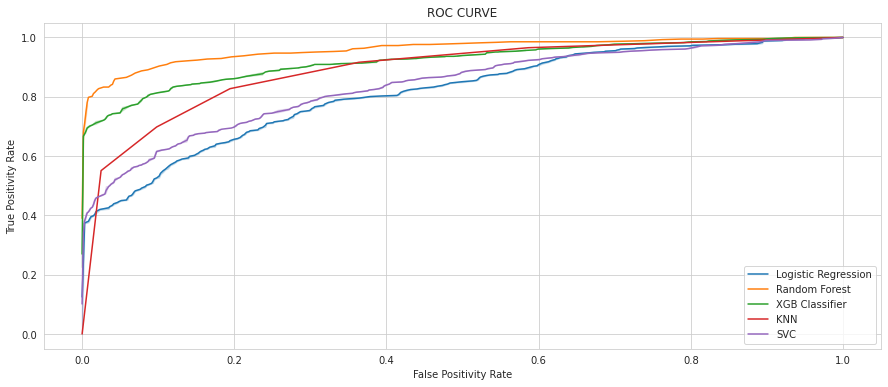

In [ ]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

5. Hyperparameter Tuning


The top models, according to the model construction section, are Random Forest and XGB Classifier.

 When compared to other models, Random Forest is overfitting to some amount but performs well on test data. As a result, we will attempt to increase the Random Forest model's performance by hyperparameter tuning.

In this scenario, the recall score is critical since we want fewer false negative numbers.

This simply forecasts that a person has no risk of heart disease when, in fact, he does. As a result, another justification for using random forest as a model.

In [ ]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
     

In [ ]:

# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall')

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [ ]:
# Hyperparameter dictionary
rf_param_dict ={'n_estimators' : [160,180,200],
                'max_depth': [10,11,12,13],
                'min_samples_split': [2,3,4]}
     

In [ ]:
# Apply the function to tune the parameters
rf_best_model, rf_df, rf_grid_train_cm, rf_grid_test_cm = grid_fitting('Random Forest', rf_param_dict, RandomForestClassifier())

In [ ]:
# The best estimators of the model
rf_best_model

RandomForestClassifier(max_depth=13, n_estimators=180)

#RandomForestClassifier(max_depth=12, n_estimators=200)

In [ ]:
# Dataframe showing scores of the model after hyperparameter tuning
rf_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Random Forest,0.991533,0.894097,0.992685,0.906844,0.990554,0.867273,0.991544,0.892939


In [ ]:
# Confusion matrix of training data after hyperparameter tuning
rf_grid_train_cm

array([[2260,   17],
       [  22, 2307]])

In [ ]:
# Confusion matrix of test data after hyperparameter tuning
rf_grid_test_cm

array([[553,  49],
       [ 73, 477]])

#As we can see, the hyperparameter adjustment has not resulted in much of an improvement; nonetheless, overfitting has been reduced while the scores produced from the original model have been maintained.


#SHAP will aid in increasing model explainability and improving our predictions.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 18.1 MB/s 


In [ ]:
# Importing SHAP
import shap

In [ ]:
# Creating instances of shap
explainer = shap.TreeExplainer(rf_best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'])


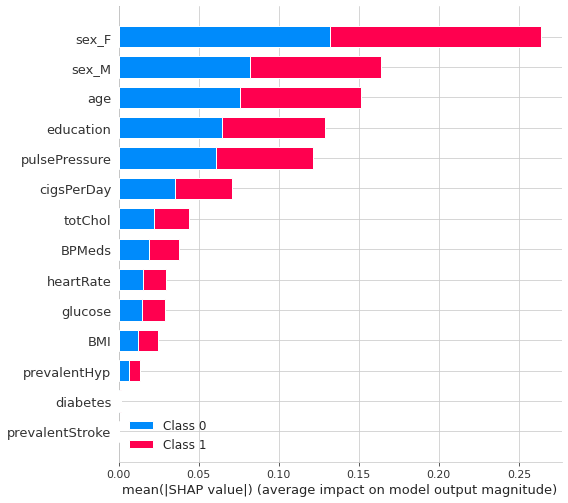

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

#The preceding figure shows the feature importances; practically all of the features influence the dependent variable. Gender has the greatest influence, followed by age and pulse pressure.

#Conclusion-

As a project conclusion, I'd want to summarise the process and some project details.

The data was cleaned, an EDA was performed, data transformation was made to guarantee it fits well into machine learning models, modelling and model evaluation were performed, and lastly hyperparameter tuning was performed in an attempt to improve the model.

The project included five models: Logistic Regression, Random Forest, XGB Classifier, KNN, and SVM. Random Forest was the most effective basis model. The same model was used for hyperparameter adjustment.

The model's final results are nearly identical to the base model, and we have achieved nearly 90% test accuracy and precision, whereas we have achieved almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and pulse pressure were 3 main influencers.

The model's final findings are nearly identical to the base model, and we have achieved nearly 90% test accuracy and precision, where as we have achieved.
